In [7]:
import csv

import pandas as pd
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import seaborn

# Load and clean dataset

In [14]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("./Telco-Customer-Churn.csv")
original_df = df.copy(deep=True)
df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
df["InternetService"] = df["InternetService"].map({"No": 0, "DSL": 1, "Fiber optic": 2})
df["Contract"] = df["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
df["PaymentMethod"] = df["PaymentMethod"].map(
    {"Electronic check": 0, "Mailed check": 1, "Bank transfer (automatic)": 2, "Credit card (automatic)": 3})
# https://stackoverflow.com/a/78066237
with pd.option_context("future.no_silent_downcasting", True):
    df = df.replace({"No": 0, "Yes": 1, "No internet service": 2, "No phone service": 2}).infer_objects(copy=False)
    df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda loc: pd.to_numeric(loc, errors="coerce"))
    df = df.fillna(0).infer_objects(copy=False)

# Exploratory Data Analysis

In [6]:
# Correlation matrix
df.iloc[:, 1:].corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.000485,0.010380,0.003429,0.002032,-0.005092,-0.000985,-0.001156,0.000191,-0.000126,0.011754,0.005209,0.014569,0.000080,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.259390,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,0.156530,-0.093704,0.220173,0.103006,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.294806,-0.014877,0.133115,0.096848,0.317504,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.243187,-0.111377,0.123844,-0.113890,0.062078,-0.164221
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.033230,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.671607,0.006152,0.340305,0.247900,0.826178,-0.352229
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,0.093720,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,0.002247,0.016505,-0.004070,0.247398,0.113214,0.011942
MultipleLines,0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.078613,0.108230,0.030659,0.146153,0.250628,0.019423
InternetService,0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.174989,1.000000,-0.764943,-0.686403,-0.682448,-0.760985,-0.617704,-0.620005,-0.290189,0.378108,-0.178137,0.905491,0.428963,0.316846
OnlineSecurity,0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,-0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.389978,-0.334003,0.213800,-0.621227,-0.154380,-0.332819
OnlineBackup,0.002032,-0.152780,0.087055,0.162445,0.178651,0.150338,-0.210372,-0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.351267,-0.262402,0.182909,-0.538454,-0.086220,-0.291449


<Axes: xlabel='gender', ylabel='MonthlyCharges'>

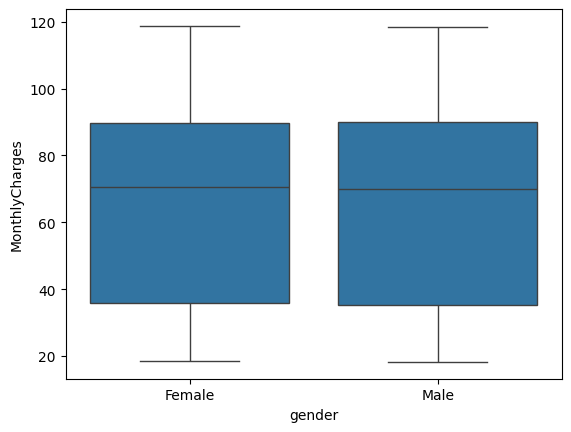

In [15]:
seaborn.boxplot(data=original_df, x="gender", y="MonthlyCharges")

<Axes: xlabel='SeniorCitizen', ylabel='MonthlyCharges'>

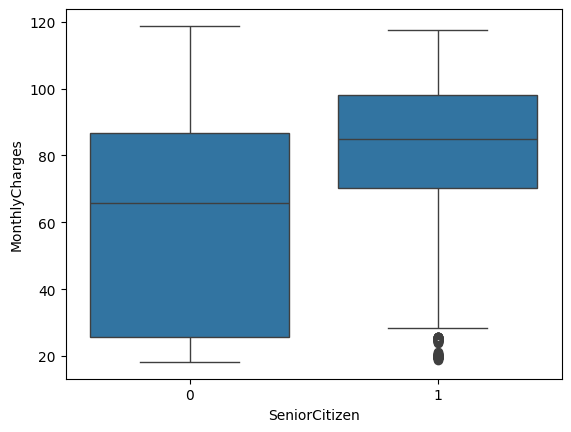

In [16]:
seaborn.boxplot(data=original_df, x="SeniorCitizen", y="MonthlyCharges")

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

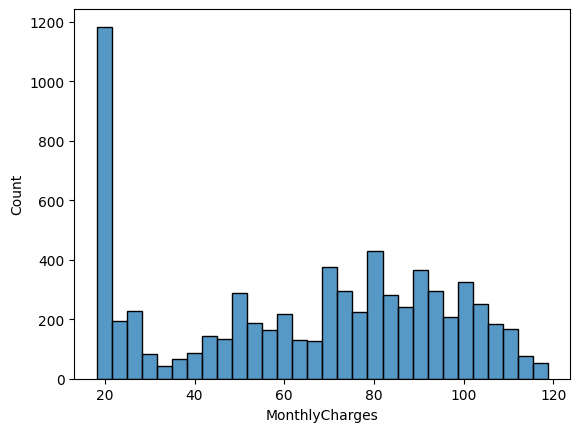

In [29]:
seaborn.histplot(data=original_df, x="MonthlyCharges", bins=30)

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

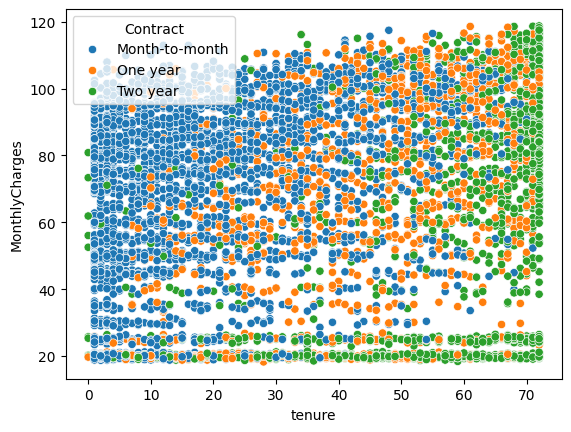

In [32]:
seaborn.scatterplot(data=original_df, x="tenure", y="MonthlyCharges", hue="Contract")

# Create training dataset

In [33]:
dataset = df.iloc[:, 1:].to_numpy()
np.random.shuffle(dataset)
data = dataset[:, :-1]
target = dataset[:, -1]

# Convert to one-hot encoded
target = keras.utils.to_categorical(target, 2)

In [34]:
# 80/20 dataset split
split = int(len(dataset) * 0.8)

train, target_train = data[:split], target[:split]
test, target_test = data[split:], target[split:]

In [51]:
save_csv_path = "./model_metrics.csv"

# Metrics saver
class DataSaver(keras.callbacks.Callback):
    def __init__(self, save_path):
        super(DataSaver, self).__init__()
        self.save_path = save_path
        self.csvfile = open(save_path, 'w', newline='')
        header = ["Epoch", "Train accuracy", "Test accuracy", "Train loss", "Test loss"]
        self.writer = csv.DictWriter(self.csvfile, fieldnames=header)
        self.writer.writeheader()

    def on_epoch_end(self, epoch, logs=None):
        self.writer.writerow({
            "Epoch": epoch + 1,
            "Train accuracy": logs["accuracy"],
            "Test accuracy": logs["val_accuracy"],
            "Train loss": logs["loss"],
            "Test loss": logs["val_loss"]
        })

    def on_train_end(self, logs=None):
        self.csvfile.close()

# Classification model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=19),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(2, activation='softmax'),
])

model.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

saver = DataSaver(save_csv_path)

# Training
model.fit(train, target_train, epochs=100, batch_size=64, validation_data=(test, target_test), callbacks=[saver])

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5975 - loss: 43.7215 - val_accuracy: 0.7410 - val_loss: 19.2989
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 11.9261 - val_accuracy: 0.7466 - val_loss: 13.5250
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 9.9940 - val_accuracy: 0.7651 - val_loss: 2.5273
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6728 - loss: 7.6749 - val_accuracy: 0.7630 - val_loss: 5.5012
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7017 - loss: 5.9589 - val_accuracy: 0.7700 - val_loss: 1.4362
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7029 - loss: 4.4266 - val_accuracy: 0.7424 - val_loss: 10.1068
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7117 - loss: 4.7819 - val_accuracy: 0.7573 - val_loss: 0.7611
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6947 - loss: 4.0998 - val_accuracy: 0.746